<br>

# Python Project: An Online Retail Business
Ziqi Polimeros<br>
2/24/2022

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

Data source：
https://www.kaggle.com/gabrielramos87/an-online-shop-business

## Introduction
(The following information is directly cided from Kaggle.)

E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.


This is a dataset of UK-based B2C e-commerce sales transactions for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.
The dataset contains 500K rows and 8 columns. The following is the description of each column.

- TransactionNo (nominal): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (nominal): a five or six-digit unique character used to identify a specific product.
- Product (nominal): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (nominal): a five-digit unique number that defines each customer.
- Country (nominal): name of the country where the customer resides.

## Analysis 1: Load the dataset


In [2]:
sales = pd.read_csv("Business Sales Transaction.csv")


In [3]:
# change the data type of 'Date' column, seperate them to 'Year' column and 'Month' column
sales["Date"] = pd.to_datetime(sales["Date"])
sales["Year"] = pd.DatetimeIndex(sales["Date"]).year
sales["Month"] = pd.DatetimeIndex(sales["Date"]).month
 
# convert "CustomerNo" to factor
sales["CustomerNo"] = sales['CustomerNo'].astype('category')
sales

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
0,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,383.40,13069.0,United Kingdom,2019,12
1,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,138.36,13069.0,United Kingdom,2019,12
2,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,127.80,13069.0,United Kingdom,2019,12
3,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,71.64,13069.0,United Kingdom,2019,12
4,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,255.60,13069.0,United Kingdom,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22631,Circus Parade Lunch Box,12.25,-1,-12.25,12472.0,Germany,2018,12
536346,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,-37.92,12472.0,Germany,2018,12
536347,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,-42.27,12472.0,Germany,2018,12
536348,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,-11.74,12472.0,Germany,2018,12


In [4]:

# filter out the sales of December 2019 which only has 10 days records
sales_filter = sales[(sales['Year'] !=2019)|(sales["Month"] !=12)]

## Analysis 2:  Overview 

In [11]:
# calculate the overview of the dataset
# total revenue was over 60 million pounds sterlings
total_revenue = sales_filter.Revenue[sales_filter.Revenue>0].sum()/1000000
total_revenue

63.982402409999985

In [12]:
# total returns
total_return = sales_filter.Revenue[sales_filter.Revenue<0].sum()/1000000
total_return

-2.2263961

In [6]:
# total products was over five millions
sales_filter.Quantity[sales_filter.Quantity>0].sum()/1000000

5.27829

In [57]:
# unique product ID's
len(sales_filter["ProductNo"].unique())

3766

In [18]:
# unique customer numbers
customer_num = len(sales_filter["CustomerNo"].unique())
customer_num 

4692

In [59]:
# unique countries
len(sales_filter["Country"].unique())

38

## Analysis 3:  Monthly Revenue

In [5]:
# calculate total sales by each month
revenue = sales_filter.groupby(["Year","Month","Country"]).sum()["Revenue"].reset_index()

# read 'Countries' dataset
countries = pd.read_csv("Countries.csv")

# join countries dataset
revenue = pd.merge(revenue,countries, on = "Country", how = "left")
revenue

,Year,Month,Country,Revenue,No,CountryCode,M49 Code,Region 1,Region 2,Continent
0,2018,12,Australia,5683.41,14.0,AUS,36.0,Australia and New Zealand,NaN,Oceania
1,2018,12,Austria,-512.64,15.0,AUT,40.0,Western Europe,NaN,Europe
2,2018,12,Belgium,42831.07,22.0,BEL,56.0,Western Europe,NaN,Europe
3,2018,12,Cyprus,11681.98,61.0,CYP,196.0,Western Asia,NaN,Asia
4,2018,12,Denmark,5736.86,65.0,DNK,208.0,Northern Europe,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...
276,2019,11,Spain,30758.03,211.0,ESP,724.0,Southern Europe,NaN,Europe
277,2019,11,Sweden,22377.84,217.0,SWE,752.0,Northern Europe,NaN,Europe
278,2019,11,Switzerland,46558.04,218.0,CHE,756.0,Western Europe,NaN,Europe
279,2019,11,United Kingdom,7990000.14,235.0,GBR,826.0,Northern Europe,NaN,Europe


In [9]:

# replace continents that are not Europe to "others"
revenue_filter.Continent[revenue_filter.Continent != 'Europe'] = "Others"



C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/2591139789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# combine "Year" and "Month" to one column, "Date"
revenue_filter["Date"] = revenue_filter[["Year","Month"]].astype(str).agg(".".join,axis = 1)
revenue_filter["Date"] = pd.to_datetime(revenue_filter["Date"])

# convert the unit of "Revenue" to million pound sterlings
revenue_filter["Revenue"] = revenue_filter['Revenue']/1000000

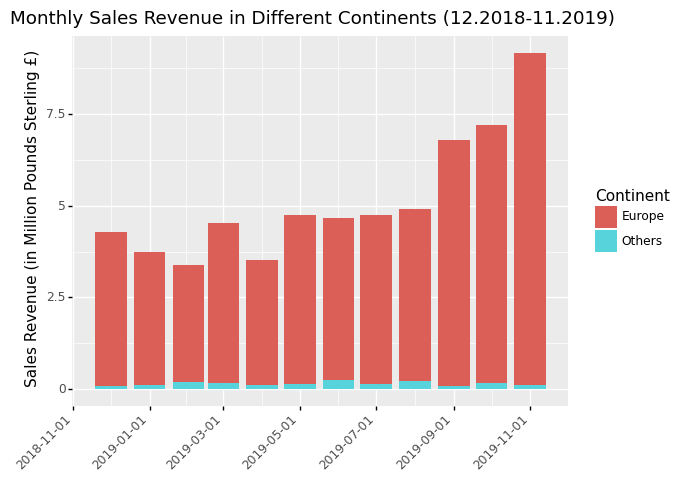

<ggplot: (152248199150)>

In [12]:
# graph monthly sales
( ggplot(revenue_filter)
   + aes(x = "Date",
         y = "Revenue",
         fill = "Continent")
   + geom_col()
   + theme(axis_text_x=element_text(rotation=45, hjust=1))
   + labs( x = "",
           y = "Sales Revenue (in Million Pounds Sterling £)",
           title = "Monthly Sales Revenue in Different Continents (12.2018-11.2019)")
)

## Analysis 4: Products


#### Products: Top 20 Best Seller

In [13]:
# create product dataframe to analyse sales for each products.
product = sales_filter.groupby(["ProductNo","ProductName","Country"]).sum().reset_index()
product["Price"] = product["Revenue"]/product["Quantity"]
product

,ProductNo,ProductName,Country,Price,Quantity,Revenue,Year,Month
0,10002,Inflatable Political Globe,Belgium,11.950000,2,23.90,2018,12
1,10002,Inflatable Political Globe,EIRE,11.120000,12,133.44,2018,12
2,10002,Inflatable Political Globe,France,11.120000,372,4136.64,16149,44
3,10002,Inflatable Political Globe,Germany,11.673333,3,35.02,4037,13
4,10002,Inflatable Political Globe,Japan,11.120000,1,11.12,2019,2
...,...,...,...,...,...,...,...,...
22130,90214V,"Letter ""V"" Bling Key Ring",United Kingdom,11.164286,14,156.30,26245,89
22131,90214W,"Letter ""W"" Bling Key Ring",United Kingdom,11.105000,4,44.42,8076,13
22132,90214Y,"Letter ""Y"" Bling Key Ring",Belgium,11.120000,1,11.12,2018,12
22133,90214Y,"Letter ""Y"" Bling Key Ring",United Kingdom,11.190000,5,55.95,10095,29


In [14]:
# choose the top 20 products
product = product.sort_values(by = ['Revenue'],ascending = False)
names = product["ProductName"][:20]

# create a new dataframe
product_20 = pd.DataFrame(columns = product.columns.values)
 

In [15]:
# the top 20 marketable products
for n in names:
    product_20 = product_20.append(product[product["ProductName"] == n])
product_20    

C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/519536825.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Us

,ProductNo,ProductName,Country,Price,Quantity,Revenue,Year,Month
6786,22197,Popcorn Holder,United Kingdom,11.187235,46819,523775.15,2590259,9687
6774,22197,Popcorn Holder,EIRE,11.043031,1689,18651.68,74700,300
6775,22197,Popcorn Holder,France,11.194036,389,4354.48,62587,231
6781,22197,Popcorn Holder,Norway,11.044419,344,3799.28,8074,44
6783,22197,Popcorn Holder,Singapore,10.99,300,3297.0,6057,15
...,...,...,...,...,...,...,...,...
4983,21915,Red Harmonica In Box,Norway,11.53,24,276.72,4038,15
4990,21915,Red Harmonica In Box,Unspecified,11.53,12,138.36,2019,7
4981,21915,Red Harmonica In Box,Italy,11.53,12,138.36,2019,10
4974,21915,Red Harmonica In Box,Austria,12.77,3,38.31,2019,11


In [16]:
# covert the revenue in million pounds sterling
product_20['Revenue'] = product_20["Revenue"]/1000000

# combine product_20 dataframe with countries dataframe
product_20 = pd.merge(product_20,countries, on = "Country", how = "left")
product_20


,ProductNo,ProductName,Country,Price,Quantity,Revenue,Year,Month,No,CountryCode,M49 Code,Region 1,Region 2,Continent
0,22197,Popcorn Holder,United Kingdom,11.187235,46819,0.523775,2590259,9687,235.0,GBR,826.0,Northern Europe,NaN,Europe
1,22197,Popcorn Holder,EIRE,11.043031,1689,0.018652,74700,300,NaN,NaN,NaN,NaN,NaN,Europe
2,22197,Popcorn Holder,France,11.194036,389,0.004354,62587,231,81.0,FRA,250.0,Western Europe,NaN,Europe
3,22197,Popcorn Holder,Norway,11.044419,344,0.003799,8074,44,166.0,NOR,578.0,Northern Europe,NaN,Europe
4,22197,Popcorn Holder,Singapore,10.99,300,0.003297,6057,15,202.0,SGP,702.0,South-eastern Asia,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,21915,Red Harmonica In Box,Norway,11.53,24,0.000277,4038,15,166.0,NOR,578.0,Northern Europe,NaN,Europe
317,21915,Red Harmonica In Box,Unspecified,11.53,12,0.000138,2019,7,NaN,NaN,NaN,NaN,NaN,NaN
318,21915,Red Harmonica In Box,Italy,11.53,12,0.000138,2019,10,114.0,ITA,380.0,Southern Europe,NaN,Europe
319,21915,Red Harmonica In Box,Austria,12.77,3,0.000038,2019,11,15.0,AUT,40.0,Western Europe,NaN,Europe


In [17]:
# Sum the value of revenue
product_20 = product_20[["ProductName","Country","Revenue"]].groupby(["ProductName","Country"]).sum().reset_index()

# replace countries that are not United Kingdom to "Others"
product_20.Country[product_20["Country"] != "United Kingdom"]= "Others"

C:\Users\aladd\AppData\Local\Temp/ipykernel_26188/2668608904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


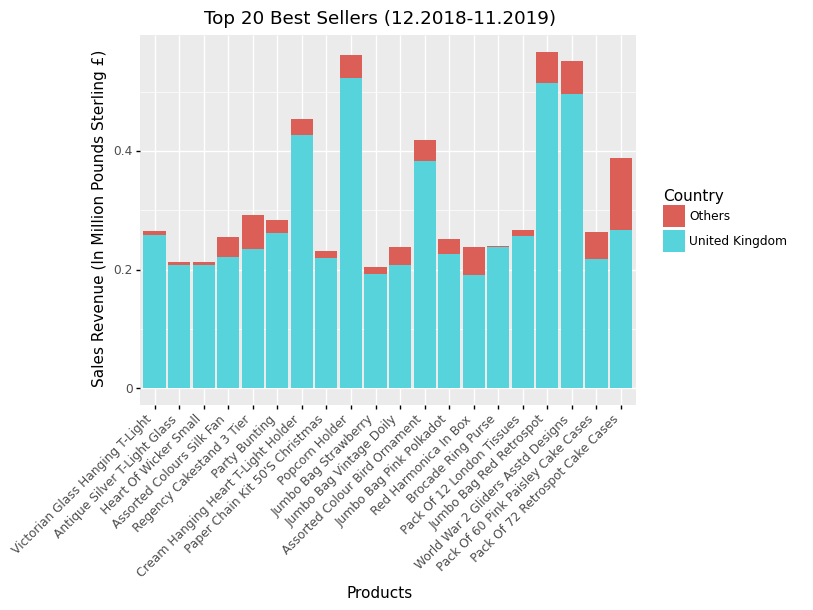

<ggplot: (152249876351)>

In [18]:
# Top 20 best sellers
(ggplot(data = product_20,
        mapping = aes(y = 'Revenue', x = "reorder(ProductName,Revenue)", fill = "Country"))
 + geom_col()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs( x = "Products",
         y = "Sales Revenue (In Million Pounds Sterling £)",
         title = "Top 20 Best Sellers (12.2018-11.2019)")

)

#### Return Products

In [24]:
# filter Revenue smaller than zero and calculate return products
product_return = sales_filter[sales_filter["Revenue"] < 0].groupby(["ProductName","Country"]).sum().sort_values(by = ['Revenue'],ascending = True).reset_index()

In [25]:
#choose product name of top 20 return products 
r_names = product_return["ProductName"][:20]

# create a new dataframe 
product_return20 = pd.DataFrame(columns = product_return.columns.values)


In [26]:
# add 20 biggest return products
for n in r_names:
    product_return20 = product_return20.append(product_return[product_return["ProductName"] == n])
    
product_return20

C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/2736125360.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,ProductName,Country,Price,Quantity,Revenue,Year,Month
0,Medium Ceramic Top Storage Jar,United Kingdom,68.55,-74467,-842967.07,12114,39
1154,Medium Ceramic Top Storage Jar,United States,11.53,-12,-138.36,2019,10
1169,Medium Ceramic Top Storage Jar,EIRE,11.53,-12,-138.36,2019,8
2175,Medium Ceramic Top Storage Jar,Switzerland,11.32,-2,-22.64,2019,9
2535,Medium Ceramic Top Storage Jar,Australia,11.53,-1,-11.53,2019,7
1,Rotating Silver Angels T-Light Hldr,United Kingdom,23.14,-9361,-96233.66,4037,22
1559,Rotating Silver Angels T-Light Hldr,EIRE,12.86,-6,-77.16,2019,1
2,Fairy Cake Flannel Assorted Colour,United Kingdom,23.46,-3132,-38812.68,4038,15
3,Cream Hanging Heart T-Light Holder,United Kingdom,511.38,-2550,-32833.18,78736,247
631,Cream Hanging Heart T-Light Holder,EIRE,13.27,-24,-318.48,2018,12


In [27]:
# convert the return revenue in million pounds sterling
product_return20["Revenue"] = product_return20["Revenue"]/1000000

product_return20 = product_return20.groupby(["ProductName","Country"]).sum().reset_index()

# replace Countries that are not 'United Kingdom' to 'others'
product_return20.Country[product_return20["Country"] != "United Kingdom"] = "Others"

C:\Users\aladd\AppData\Local\Temp/ipykernel_32940/3661525118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\scales\scale.py:102: PlotnineWarning: scale_x_discrete could not recognise parameter `position`


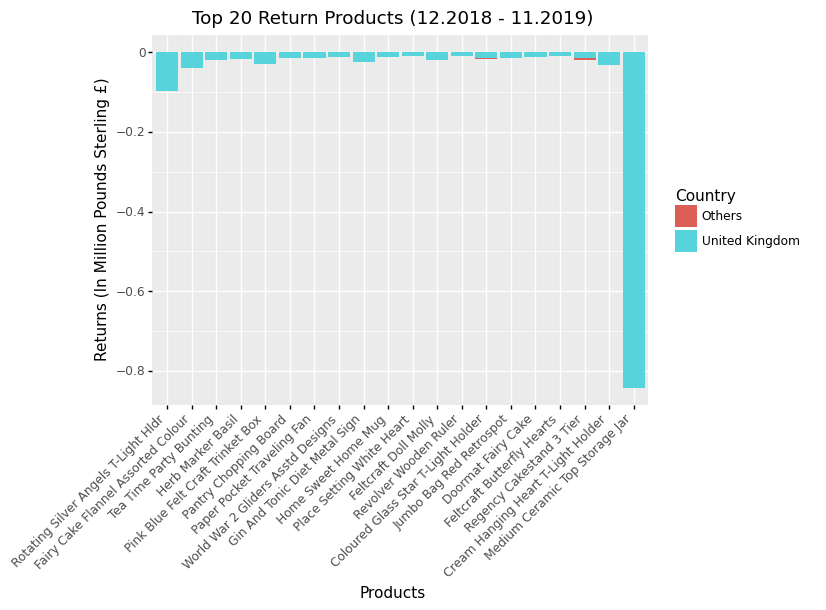

<ggplot: (152255300136)>

In [24]:
# graph top 20 return product with reoder product name base on revenue
(ggplot(data = product_return20,
        mapping = aes(x = "reorder(ProductName, Revenue)", y = "Revenue", fill = "Country"))
 + geom_col()
 + scale_x_discrete(position = "top")
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs(x = "Products",
        y = "Returns (In Million Pounds Sterling £)",
        title = "Top 20 Return Products (12.2018 - 11.2019)")
)

In [29]:
# the largest return product
C572991 = sales_filter[(sales_filter["ProductName"] == "Medium Ceramic Top Storage Jar")&(sales_filter["Revenue"]<0)]
C572991

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
119754,C572991,2019-10-27,23166,Medium Ceramic Top Storage Jar,11.53,-1,-11.53,17672.0,United Kingdom,2019,10
148082,C570867,2019-10-12,23166,Medium Ceramic Top Storage Jar,11.53,-12,-138.36,12607.0,United States,2019,10
190497,C567535,2019-09-21,23166,Medium Ceramic Top Storage Jar,11.53,-1,-11.53,15253.0,United Kingdom,2019,9
190527,C567677,2019-09-21,23166,Medium Ceramic Top Storage Jar,11.32,-2,-22.64,12409.0,Switzerland,2019,9
242371,C562952,2019-08-11,23166,Medium Ceramic Top Storage Jar,11.53,-1,-11.53,12749.0,United Kingdom,2019,8
250130,C562375,2019-08-04,23166,Medium Ceramic Top Storage Jar,11.53,-12,-138.36,14911.0,EIRE,2019,8
270120,C560540,2019-07-19,23166,Medium Ceramic Top Storage Jar,11.53,-1,-11.53,12415.0,Australia,2019,7
306611,C557508,2019-06-20,23166,Medium Ceramic Top Storage Jar,11.32,-240,-2716.80,16684.0,United Kingdom,2019,6
336759,C554527,2019-05-24,23166,Medium Ceramic Top Storage Jar,11.32,-9,-101.88,15251.0,United Kingdom,2019,5
475332,C541433,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,-74215,-840113.80,12346.0,United Kingdom,2019,1


In [34]:
# sales of the largest return
largest_return = C572991.Revenue.sum()/1000000

In [36]:
# percentage of the largest return
100*largest_return/product_return20.Revenue.sum()

66.93241001603936

In [13]:
# Product return rate
100*total_return/total_revenue 

-3.4797006929080716

#### Products: Correlation

In [26]:
# create a new dataframe
p1 = pd.DataFrame(columns = ['10001'])


In [27]:
# sorted product names by revenue
productName = sales_filter.groupby("ProductName").sum().sort_values(by = ['Revenue'],ascending = False).reset_index()
productName[:60]

,ProductName,Price,Quantity,Revenue,Year,Month
0,Jumbo Bag Red Retrospot,26850.17,46273,566585.68,4241794,14594
1,Popcorn Holder,15880.99,50252,561848.94,2834547,10588
2,World War 2 Gliders Asstd Designs,5491.16,52480,551628.24,1047821,3898
3,Cream Hanging Heart T-Light Holder,31186.76,34540,453829.22,4655573,15676
4,Assorted Colour Bird Ornament,17463.76,35115,418254.66,2935521,10380
5,Pack Of 72 Retrospot Cake Cases,14841.00,35772,387761.61,2721509,9001
6,Rabbit Night Light,11585.27,26382,328879.20,1841328,8527
7,Regency Cakestand 3 Tier,51941.03,12592,291873.24,4308355,14058
8,Mini Paint Set Vintage,4221.66,26145,285046.22,771226,2801
9,Party Bunting,27437.11,17904,283373.53,3430233,10525


In [28]:
# create a dataframe of top 60 best seller in daily sales
for p in productName[:60]["ProductName"]:
    # dataframe of each products
    temp = pd.DataFrame({str(p):list(sales[sales["ProductName"] == str(p)]["Quantity"])})
    # concat all the dataframe (with diffirent length)
    product_sale = pd.concat([p1,temp],axis = 1)
    p1 = product_sale
    
product_sale


,10001,Jumbo Bag Red Retrospot,Popcorn Holder,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,...,Please One Person Metal Sign,Hanging Heart Jar T-Light Holder,Set Of 4 Pantry Jelly Moulds,Small Chinese Style Scissor,72 Sweetheart Fairy Cake Cases,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Black Record Cover Frame,Dolly Girl Lunch Box,Lunch Box I Love London
0,NaN,10.0,100.0,48.0,1,16.0,2.0,24.0,10.0,36.0,...,48.0,4.0,12.0,60.0,24.0,1.0,32.0,120.0,1.0,1.0
1,NaN,5.0,4.0,1.0,3,16.0,7.0,18.0,8.0,36.0,...,6.0,-1.0,12.0,10.0,6.0,4.0,60.0,24.0,12.0,1.0
2,NaN,30.0,24.0,48.0,1,3.0,2.0,2.0,2.0,108.0,...,48.0,12.0,3.0,1.0,2.0,8.0,12540.0,24.0,12.0,1.0
3,NaN,30.0,34.0,288.0,2,8.0,3.0,24.0,6.0,36.0,...,12.0,2.0,2.0,60.0,2.0,3.0,1.0,17.0,1.0,2.0
4,NaN,10.0,68.0,144.0,4,16.0,4.0,12.0,3.0,3.0,...,1.0,6.0,12.0,2.0,1.0,3.0,4.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,NaN,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2374,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2375,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2376,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# calculate the correlation table
p_corr = product_sale.corr()

# if entire row or column is missing data, drop it.
p_corr.dropna(axis = 1, how = "all", inplace = True)
p_corr.dropna(axis = 0, how = 'all', inplace = True)

# replace other missing data with zero's, which means didn't buy or return
p_corr.fillna(0, inplace = True)

p_corr

,Jumbo Bag Red Retrospot,Popcorn Holder,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,Party Bunting,...,Please One Person Metal Sign,Hanging Heart Jar T-Light Holder,Set Of 4 Pantry Jelly Moulds,Small Chinese Style Scissor,72 Sweetheart Fairy Cake Cases,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Black Record Cover Frame,Dolly Girl Lunch Box,Lunch Box I Love London
Jumbo Bag Red Retrospot,1.000000,0.000277,-0.012685,-0.002768,-0.006866,0.004033,0.016979,-0.021362,-0.000798,-0.008299,...,-0.024711,0.010213,-0.017556,-0.053928,-0.011075,0.036256,0.189363,-0.005764,-0.028695,-0.008236
Popcorn Holder,0.000277,1.000000,-0.022117,-0.003232,-0.008644,-0.011077,-0.015841,-0.000645,-0.054895,-0.038854,...,-0.018912,-0.031782,-0.003789,0.288905,0.012049,-0.017264,-0.052069,-0.013673,0.014409,-0.001698
World War 2 Gliders Asstd Designs,-0.012685,-0.022117,1.000000,-0.012306,-0.020583,-0.006823,0.006874,0.006653,-0.102552,0.061725,...,-0.035556,0.018819,-0.031751,0.096799,0.009525,0.030062,-0.021607,-0.019129,-0.008470,0.002777
Cream Hanging Heart T-Light Holder,-0.002768,-0.003232,-0.012306,1.000000,-0.001482,-0.023945,-0.020724,-0.038558,-0.038631,0.001735,...,0.034226,0.000794,-0.016780,0.124523,-0.014563,0.004465,-0.107063,-0.025834,0.008276,-0.008139
Assorted Colour Bird Ornament,-0.006866,-0.008644,-0.020583,-0.001482,1.000000,-0.012853,0.000712,-0.015576,-0.036992,-0.027413,...,0.017003,0.019095,-0.018666,0.044663,-0.020028,-0.007700,-0.102865,0.093197,-0.015345,-0.011165
Pack Of 72 Retrospot Cake Cases,0.004033,-0.011077,-0.006823,-0.023945,-0.012853,1.000000,-0.013695,0.003538,-0.037004,0.022796,...,-0.021207,0.061202,-0.013788,-0.207226,0.088980,-0.020282,-0.136627,-0.043198,0.071234,0.040165
Rabbit Night Light,0.016979,-0.015841,0.006874,-0.020724,0.000712,-0.013695,1.000000,-0.014393,-0.037840,-0.016807,...,-0.024978,-0.022838,0.004114,-0.087590,-0.013994,-0.115943,-0.125756,-0.016976,-0.014098,-0.017229
Regency Cakestand 3 Tier,-0.021362,-0.000645,0.006653,-0.038558,-0.015576,0.003538,-0.014393,1.000000,-0.028354,-0.005969,...,0.010692,0.011069,-0.015422,-0.047342,-0.021215,-0.063915,-0.051257,-0.021994,-0.009871,-0.052888
Mini Paint Set Vintage,-0.000798,-0.054895,-0.102552,-0.038631,-0.036992,-0.037004,-0.037840,-0.028354,1.000000,-0.002451,...,-0.036389,-0.049542,0.085011,0.000021,-0.026560,0.044110,0.604839,-0.044621,-0.002533,-0.069174
Party Bunting,-0.008299,-0.038854,0.061725,0.001735,-0.027413,0.022796,-0.016807,-0.005969,-0.002451,1.000000,...,0.012970,0.023191,-0.004743,-0.058641,-0.009467,-0.000567,0.019245,-0.037313,-0.023337,-0.000791


In [30]:
pd.set_option('display.max_columns', None)

#calculate the absolute value of correlation coefficients that are greater than 0.5
corr = p_corr[abs(p_corr)>= 0.5]

corr

,Jumbo Bag Red Retrospot,Popcorn Holder,World War 2 Gliders Asstd Designs,Cream Hanging Heart T-Light Holder,Assorted Colour Bird Ornament,Pack Of 72 Retrospot Cake Cases,Rabbit Night Light,Regency Cakestand 3 Tier,Mini Paint Set Vintage,Party Bunting,Pack Of 12 London Tissues,Victorian Glass Hanging T-Light,Pack Of 60 Pink Paisley Cake Cases,Assorted Colours Silk Fan,Jumbo Bag Pink Polkadot,Brocade Ring Purse,Red Harmonica In Box,Jumbo Bag Vintage Doily,Paper Chain Kit 50'S Christmas,Lunch Bag Red Retrospot,Heart Of Wicker Small,Antique Silver T-Light Glass,Jumbo Bag Strawberry,Charlotte Bag Suki Design,60 Teatime Fairy Cake Cases,Red Retrospot Charlotte Bag,Grow A Flytrap Or Sunflower In Tin,Jam Making Set Printed,Colour Glass T-Light Holder Hanging,Jumbo Bag Apples,Spaceboy Lunch Box,Jumbo Bag Baroque Black White,60 Cake Cases Vintage Christmas,Jumbo Storage Bag Suki,Pack Of 72 Skull Cake Cases,Red Toadstool Led Night Light,Vintage Snap Cards,Chilli Lights,Lunch Bag Vintage Doily,Jumbo Bag Alphabet,Place Setting White Heart,Jumbo Shopper Vintage Red Paisley,Lunch Bag Suki Design,Hanging Jam Jar T-Light Holders,Woodland Charlotte Bag,Set/20 Red Retrospot Paper Napkins,Girls Alphabet Iron On Patches,Homemade Jam Scented Candles,Lunch Bag Black Skull,Lunch Bag Apple Design,Please One Person Metal Sign,Hanging Heart Jar T-Light Holder,Set Of 4 Pantry Jelly Moulds,Small Chinese Style Scissor,72 Sweetheart Fairy Cake Cases,Lunch Bag Cars Blue,Asstd Design 3d Paper Stickers,Black Record Cover Frame,Dolly Girl Lunch Box,Lunch Box I Love London
Jumbo Bag Red Retrospot,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popcorn Holder,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World War 2 Gliders Asstd Designs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cream Hanging Heart T-Light Holder,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assorted Colour Bird Ornament,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pack Of 72 Retrospot Cake Cases,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rabbit Night Light,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regency Cakestand 3 Tier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mini Paint Set Vintage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604839,NaN,NaN,NaN
Party Bunting,NaN,NaN,NaN,Na

In [ ]:
# "Asstd Design 3d Paper Stickers" and "Mini Paint Set Vintage" is  0.604839
# "Small Chinese Style Scissor"  and " Lunch Bag Vintage Doily" is 0.545964 

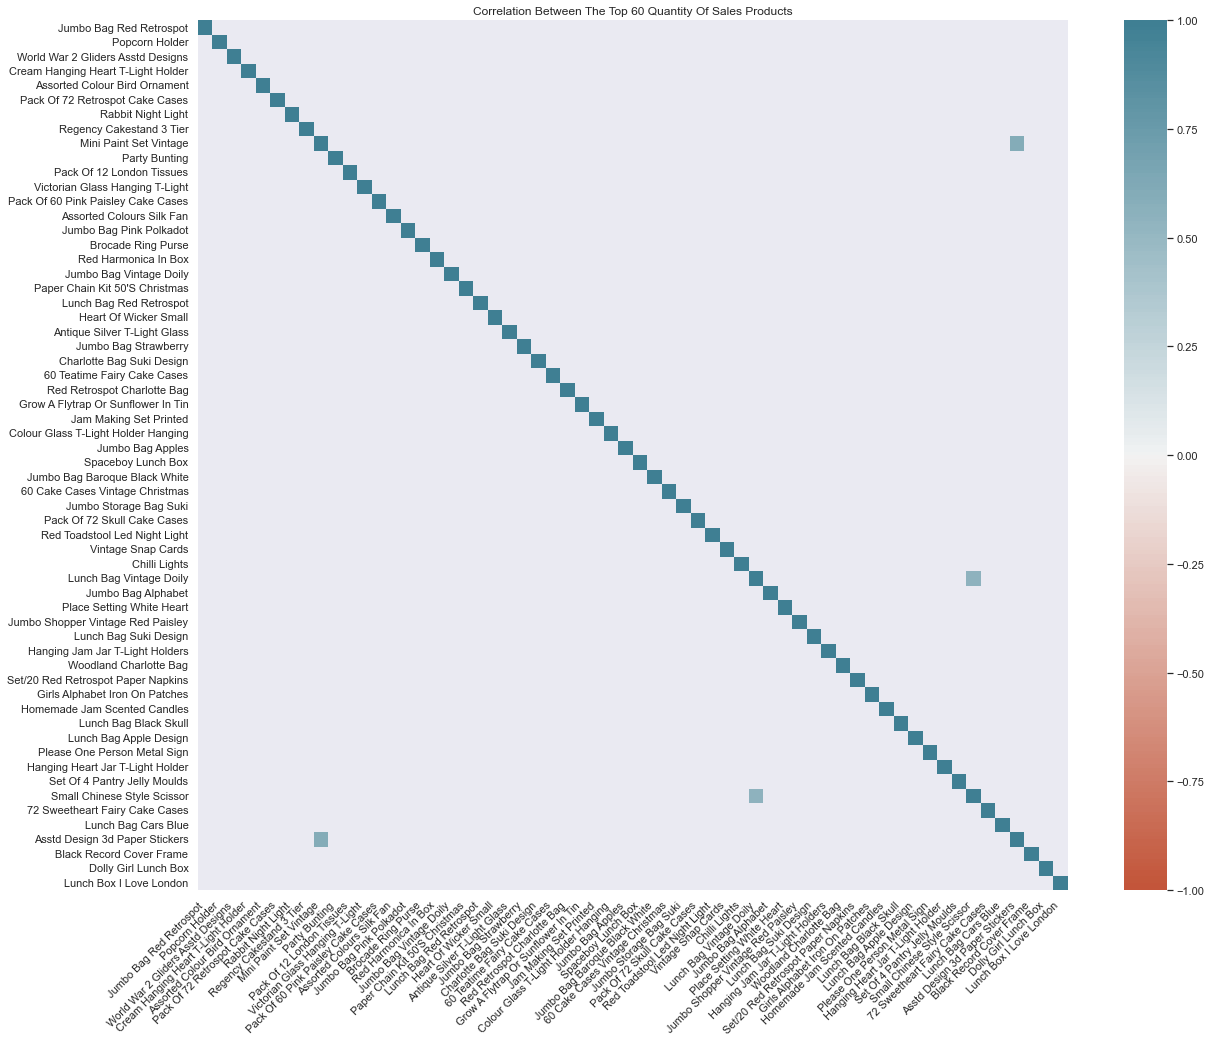

In [50]:
# correlation heat map

sns.set(rc = {'figure.figsize':(20,16)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Correlation Between The Top 60 Quantity Of Sales Products");

In [ ]:
# "Asstd Design 3d Paper Stickers" and "Mini Paint Set Vintage" is  0.604839
# "Small Chinese Style Scissor"  and " Lunch Bag Vintage Doily" is 0.545964 

## Analysis 5: Customers

In [15]:
# sum of each customer
customer = sales_filter.groupby(["CustomerNo","Country"]).sum().reset_index()
customer = customer.sort_values(by = ['Revenue'],ascending = False)
# convert revenue in million pounds sterling
customer["Revenue"] = customer["Revenue"]/1000000

customer["Revenue"] = customer["Revenue"].round(2)
customer

,CustomerNo,Country,Price,Quantity,Revenue,Year,Month
71730,14646.0,Netherlands,25147.44,189174,2.21,3997551,13049
4788,12415.0,Australia,9888.11,77242,0.92,1566744,4670
155759,17450.0,United Kingdom,4608.92,68321,0.89,676362,2261
174797,18102.0,United Kingdom,6059.54,61426,0.88,823734,3470
79544,14911.0,EIRE,75281.12,73123,0.87,11071886,43590
...,...,...,...,...,...,...,...
158685,17548.0,United Kingdom,208.66,-132,-0.00,34316,129
151351,17307.0,United Kingdom,11.34,-144,-0.00,2018,12
134859,16742.0,United Kingdom,644.57,-148,-0.00,76687,450
120457,16252.0,United Kingdom,283.99,-158,-0.00,42378,252


C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\mapping\evaluation.py:151: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\aladd\Anaconda3\lib\site-packages\plotnine\mapping\evaluation.py:151: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
C:\Users\aladd\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


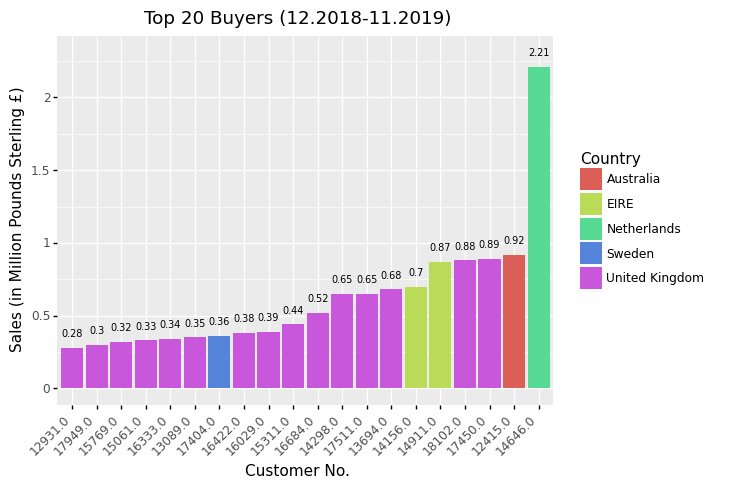

<ggplot: (152255509782)>

In [34]:
(ggplot(data = customer[:20],
        mapping = aes(y = 'Revenue', x = 'reorder(CustomerNo,Revenue)',fill = "Country",label = "Revenue"))
 + geom_col()
 + geom_text(size = 7, nudge_y=0.1)
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs( x = "Customer No.",
         y = "Sales (in Million Pounds Sterling £)",
         title = "Top 20 Buyers (12.2018-11.2019)")

)

In [16]:
# one time purchase customers
# which is sum of "Year" is 2018 or 2019
one_time_purchase_customer = customer[(customer["Year"] == 2018) | (customer["Year"] == 2019)]
one_time_purchase_customer

,CustomerNo,Country,Price,Quantity,Revenue,Year,Month
30549,13256.0,United Kingdom,10.25,12540,0.13,2019,11
175671,18133.0,United Kingdom,10.96,1350,0.01,2019,5
139191,16881.0,United Kingdom,10.99,600,0.01,2019,10
155539,17443.0,Canada,11.34,504,0.01,2019,5
134745,16737.0,United Kingdom,11.74,288,0.00,2019,10
...,...,...,...,...,...,...,...
114453,16061.0,United Kingdom,40.95,-1,-0.00,2019,3
129957,16579.0,United Kingdom,12.86,-12,-0.00,2018,12
175861,18141.0,United Kingdom,13.27,-12,-0.00,2018,12
47687,13829.0,United Kingdom,18.96,-12,-0.00,2018,12


In [40]:
customer

,CustomerNo,Country,Price,Quantity,Revenue,Year,Month
71730,14646.0,Netherlands,25147.44,189174,2.21,3997551,13049
4788,12415.0,Australia,9888.11,77242,0.92,1566744,4670
155759,17450.0,United Kingdom,4608.92,68321,0.89,676362,2261
174797,18102.0,United Kingdom,6059.54,61426,0.88,823734,3470
79544,14911.0,EIRE,75281.12,73123,0.87,11071886,43590
...,...,...,...,...,...,...,...
158685,17548.0,United Kingdom,208.66,-132,-0.00,34316,129
151351,17307.0,United Kingdom,11.34,-144,-0.00,2018,12
134859,16742.0,United Kingdom,644.57,-148,-0.00,76687,450
120457,16252.0,United Kingdom,283.99,-158,-0.00,42378,252


In [19]:
# percentage of one-time purchase customers
100*len(one_time_purchase_customer)/customer_num

2.195225916453538

In [48]:
# the biggest buyer 
c14646 = sales[sales["CustomerNo"]== 14646]

In [49]:
c14646

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Revenue,CustomerNo,Country,Year,Month
2338,581338,2019-12-08,23344,Jumbo Bag 50'S Christmas,12.08,140,1691.20,14646.0,Netherlands,2019,12
8272,581175,2019-12-07,22973,Children's Circus Parade Mug,11.74,48,563.52,14646.0,Netherlands,2019,12
8273,581175,2019-12-07,23280,Folding Butterfly Mirror Hot Pink,10.99,96,1055.04,14646.0,Netherlands,2019,12
8274,581175,2019-12-07,23281,Folding Butterfly Mirror Red,10.99,96,1055.04,14646.0,Netherlands,2019,12
8275,581175,2019-12-07,23498,Classic Bicycle Clips,11.53,72,830.16,14646.0,Netherlands,2019,12
...,...,...,...,...,...,...,...,...,...,...,...
497141,539491,2018-12-20,47599A,Pink Party Bags,12.40,2,24.80,14646.0,Netherlands,2018,12
497142,539491,2018-12-20,22331,Woodland Party Bag + Sticker Set,11.94,2,23.88,14646.0,Netherlands,2018,12
497143,539491,2018-12-20,22333,Retrospot Party Bag + Sticker Set,11.94,2,23.88,14646.0,Netherlands,2018,12
497144,539491,2018-12-20,22315,200 Red + White Bendy Straws,11.53,1,11.53,14646.0,Netherlands,2018,12


<br>